In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
sns.set(style="darkgrid")

# 데이터 불러오기 & 필요한 데이터 Filter

In [3]:
df = pd.read_excel('./최종 데이터 그래프그리기용.xlsx') 
print(df)

      Sample_ID GROUP  COHORT SEX  AGE     Trait FitbitOX      Fitbit_ID  HTN  \
0         S0001   SMI       2   M   60  fitbit_O        O  sevrance00001  NaN   
1         S0002   SMI       2   M   61  fitbit_O        O  sevrance00002  NaN   
2         S0003   SMI       2   F   52  fitbit_O        O  sevrance00003  NaN   
3         S0004   SMI       2   F   41  fitbit_O        O  sevrance00004  NaN   
4         S0005   SMI       2   F   41  fitbit_O        O  sevrance00005  NaN   
..          ...   ...     ...  ..  ...       ...      ...            ...  ...   
386  MetS_S0280  MetS       1   F   24  fitbit_O        O   gnfmmets+139  NaN   
387  MetS_S0281  MetS       1   F   44  fitbit_O        O   gnfmmets+140  NaN   
388  MetS_S0282  MetS       1   F   37  fitbit_O        O   gnfmmets+141  1.0   
389  MetS_S0283  MetS       1   M   51  fitbit_X        X              X  NaN   
390  MetS_S0284  MetS       1   F   42  fitbit_X        X              X  NaN   

      DM  ...  BDI_Q13_2 BD

In [4]:
cut_df=df[['Sample_ID','GROUP','SEX','AGE','HDL_1','HDL_2','TG_1','TG_2','LDL_1','LDL_2','MD_wine_1','MD_wine_2','SMOKE_1','SMOKE_2','PSQI_TOTAL_1','PSQI_TOTAL_2']]

In [5]:
cut_df

,Sample_ID,GROUP,SEX,AGE,HDL_1,HDL_2,TG_1,TG_2,LDL_1,LDL_2,MD_wine_1,MD_wine_2,SMOKE_1,SMOKE_2,PSQI_TOTAL_1,PSQI_TOTAL_2
0,S0001,SMI,M,60,61,77.0,81,75.0,111,112.0,0.0,0.0,3,3,8.0,7.0
1,S0002,SMI,M,61,60,59.0,106,101.0,77,77.0,0.0,1.0,2,2,4.0,8.0
2,S0003,SMI,F,52,40,40.0,231,183.0,155,128.0,0.0,0.0,1,1,3.0,4.0
3,S0004,SMI,F,41,58,54.0,94,78.0,145,119.0,0.0,0.0,1,1,6.0,6.0
4,S0005,SMI,F,41,81,72.0,70,42.0,123,114.0,0.0,0.0,1,1,10.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,MetS_S0280,MetS,F,24,61,NaN,51,NaN,120,NaN,0.0,0.0,1,1,5.0,NaN
387,MetS_S0281,MetS,F,44,45,NaN,104,NaN,103,NaN,0.0,0.0,1,1,3.0,NaN
388,MetS_S0282,MetS,F,37,53,NaN,128,NaN,82,NaN,0.0,0.0,1,1,3.0,NaN
389,MetS_S0283,MetS,M,51,57,NaN,163,NaN,150,NaN,0.0,0.0,1,1,5.0,NaN


In [6]:
cut_df_n=cut_df.dropna()
cut_df_n.reset_index(drop=True, inplace=True)
cut_df_n.isnull().sum()

Sample_ID       0
GROUP           0
SEX             0
AGE             0
HDL_1           0
HDL_2           0
TG_1            0
TG_2            0
LDL_1           0
LDL_2           0
MD_wine_1       0
MD_wine_2       0
SMOKE_1         0
SMOKE_2         0
PSQI_TOTAL_1    0
PSQI_TOTAL_2    0
dtype: int64

# TC 데이터 추가

In [7]:
#TC = HDL-C + LDL-C + TG/5

tc_1_list=[]
tc_2_list=[]

for index, row in cut_df_n.iterrows():

    tc_1=int(row[4])+int(row[8])+int(row[6])/5
    tc_1_list.append(tc_1)

    tc_2=int(row[5])+int(row[9])+int(row[7])/5
    tc_2_list.append(tc_2)

len(tc_1_list)

235

In [8]:
TC_df=pd.DataFrame({'TC_1':tc_1_list,'TC_2':tc_2_list})

cut_df_t=pd.concat([cut_df_n,TC_df], axis=1)

cut_df_t

,Sample_ID,GROUP,SEX,AGE,HDL_1,HDL_2,TG_1,TG_2,LDL_1,LDL_2,MD_wine_1,MD_wine_2,SMOKE_1,SMOKE_2,PSQI_TOTAL_1,PSQI_TOTAL_2,TC_1,TC_2
0,S0001,SMI,M,60,61,77.0,81,75.0,111,112.0,0.0,0.0,3,3,8.0,7.0,188.2,204.0
1,S0002,SMI,M,61,60,59.0,106,101.0,77,77.0,0.0,1.0,2,2,4.0,8.0,158.2,156.2
2,S0003,SMI,F,52,40,40.0,231,183.0,155,128.0,0.0,0.0,1,1,3.0,4.0,241.2,204.6
3,S0004,SMI,F,41,58,54.0,94,78.0,145,119.0,0.0,0.0,1,1,6.0,6.0,221.8,188.6
4,S0005,SMI,F,41,81,72.0,70,42.0,123,114.0,0.0,0.0,1,1,10.0,8.0,218.0,194.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,MetS_S0217,MetS,F,63,55,66.0,64,46.0,65,56.0,0.0,0.0,1,1,3.0,8.0,132.8,131.2
231,MetS_S0218,MetS,M,57,51,51.0,62,76.0,57,66.0,0.0,0.0,1,1,4.0,3.0,120.4,132.2
232,MetS_S0220,MetS,F,35,58,49.0,88,91.0,94,83.0,0.0,0.0,1,1,1.0,2.0,169.6,150.2
233,MetS_S0222,MetS,F,61,58,60.0,65,62.0,52,53.0,0.0,0.0,1,1,8.0,7.0,123.0,125.4


# PSQI 점수와 혈중 지질 농도(TG, LDL)

In [9]:
df_psqi = cut_df.dropna(subset = ['PSQI_TOTAL_1','PSQI_TOTAL_2','HDL_2','TG_2','LDL_2'])
df_psqi.isnull().sum()

Sample_ID        0
GROUP            0
SEX              0
AGE              0
HDL_1            0
HDL_2            0
TG_1             0
TG_2             0
LDL_1            0
LDL_2            0
MD_wine_1       76
MD_wine_2       76
SMOKE_1          0
SMOKE_2          0
PSQI_TOTAL_1     0
PSQI_TOTAL_2     0
dtype: int64

In [39]:
df_psqi

,Sample_ID,GROUP,SEX,AGE,HDL_1,HDL_2,TG_1,TG_2,LDL_1,LDL_2,MD_wine_1,MD_wine_2,SMOKE_1,SMOKE_2,PSQI_TOTAL_1,PSQI_TOTAL_2
0,S0001,SMI,M,60,61,77.0,81,75.0,111,112.0,0.0,0.0,3,3,8.0,7.0
1,S0002,SMI,M,61,60,59.0,106,101.0,77,77.0,0.0,1.0,2,2,4.0,8.0
2,S0003,SMI,F,52,40,40.0,231,183.0,155,128.0,0.0,0.0,1,1,3.0,4.0
3,S0004,SMI,F,41,58,54.0,94,78.0,145,119.0,0.0,0.0,1,1,6.0,6.0
4,S0005,SMI,F,41,81,72.0,70,42.0,123,114.0,0.0,0.0,1,1,10.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,MetS_S0217,MetS,F,63,55,66.0,64,46.0,65,56.0,0.0,0.0,1,1,3.0,8.0
324,MetS_S0218,MetS,M,57,51,51.0,62,76.0,57,66.0,0.0,0.0,1,1,4.0,3.0
326,MetS_S0220,MetS,F,35,58,49.0,88,91.0,94,83.0,0.0,0.0,1,1,1.0,2.0
328,MetS_S0222,MetS,F,61,58,60.0,65,62.0,52,53.0,0.0,0.0,1,1,8.0,7.0


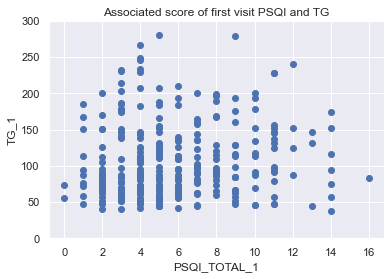

In [12]:
#TG와 PSQI
x_value=df_psqi[['PSQI_TOTAL_1']].values.tolist()
y_value=df_psqi[['TG_1']].values.tolist()


plt.scatter(x_value, y_value)
plt.ylim([0, 300])


plt.xlabel('PSQI_TOTAL_1')
plt.ylabel('TG_1')
plt.title('Associated score of first visit PSQI and TG')
plt.rcParams["figure.figsize"] = (5,5)

plt.show()

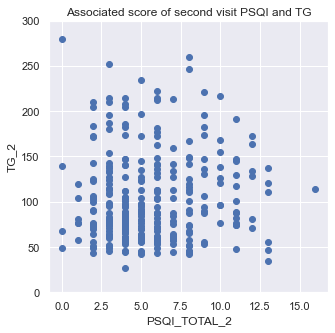

In [13]:
#TG와 PSQI
x_value=df_psqi[['PSQI_TOTAL_2']].values.tolist()
y_value=df_psqi[['TG_2']].values.tolist()


plt.scatter(x_value, y_value)
plt.ylim([0, 300])


plt.xlabel('PSQI_TOTAL_2')
plt.ylabel('TG_2')
plt.title('Associated score of second visit PSQI and TG')
plt.rcParams["figure.figsize"] = (5,10)

plt.show()

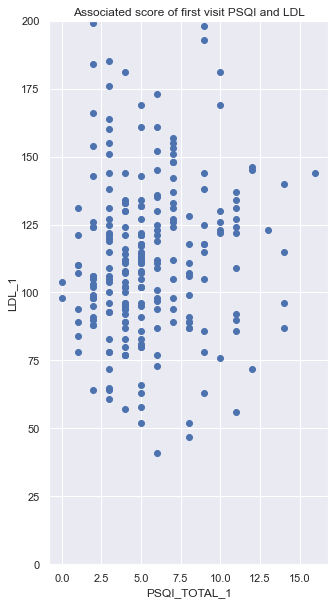

In [14]:
#LDL과 PSQI
df_s = cut_df_t.sort_values(by=["PSQI_TOTAL_1"], ascending=[True])
x_value=df_s[['PSQI_TOTAL_1']].values.tolist()
y_value=df_s[['LDL_1']].values.tolist()


plt.scatter(x_value, y_value)
plt.ylim([0, 200])


plt.xlabel('PSQI_TOTAL_1')
plt.ylabel('LDL_1')
plt.title('Associated score of first visit PSQI and LDL')
plt.rcParams["figure.figsize"] = (4,10)

plt.show()

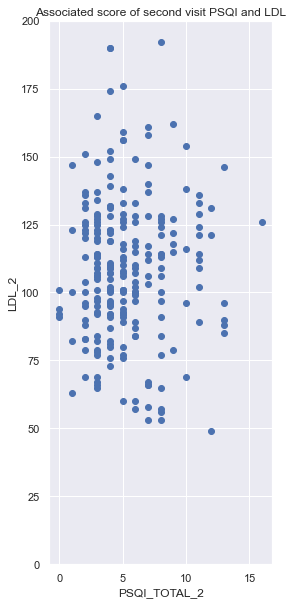

In [15]:
#LDL과 PSQI
df_s = cut_df_t.sort_values(by=["PSQI_TOTAL_2"], ascending=[True])
x_value=df_s[['PSQI_TOTAL_2']].values.tolist()
y_value=df_s[['LDL_2']].values.tolist()


plt.scatter(x_value, y_value)
plt.ylim([0, 200])


plt.xlabel('PSQI_TOTAL_2')
plt.ylabel('LDL_2')
plt.title('Associated score of second visit PSQI and LDL')
plt.rcParams["figure.figsize"] = (3,10)

plt.show()

In [16]:
df_psqi = df_psqi[(df_psqi['TG_1'] <= 300) & (df_psqi['TG_2'] <= 300) & (df_psqi['LDL_1'] <= 200) & (df_psqi['LDL_2'] <= 200)]
tg_psqi = pd.DataFrame(df_psqi.groupby(['PSQI_TOTAL_1']).TG_1.mean())
ldl_psqi = pd.DataFrame(df_psqi.groupby(['PSQI_TOTAL_1']).LDL_1.mean())

psqi_1=pd.concat([tg_psqi,ldl_psqi],axis=1)
psqi_1

,TG_1,LDL_1
PSQI_TOTAL_1,,
0.0,65.000000,101.000000
1.0,105.100000,99.200000
2.0,92.080000,116.200000
3.0,111.947368,115.605263
4.0,104.104167,107.854167
5.0,97.434783,108.630435
6.0,102.896552,112.827586
7.0,102.521739,124.782609
8.0,118.722222,96.111111


In [17]:
tg_psqi = pd.DataFrame(df_psqi.groupby(['PSQI_TOTAL_2']).TG_2.mean())
ldl_psqi = pd.DataFrame(df_psqi.groupby(['PSQI_TOTAL_2']).LDL_2.mean())

psqi_2=pd.concat([tg_psqi,ldl_psqi],axis=1)
psqi_2

,TG_2,LDL_2
PSQI_TOTAL_2,,
0.0,134.000000,94.500000
1.0,86.000000,95.833333
2.0,106.500000,109.958333
3.0,108.704545,106.727273
4.0,95.153846,109.961538
5.0,91.384615,107.769231
6.0,106.900000,102.525000
7.0,93.526316,105.421053
8.0,105.083333,101.041667


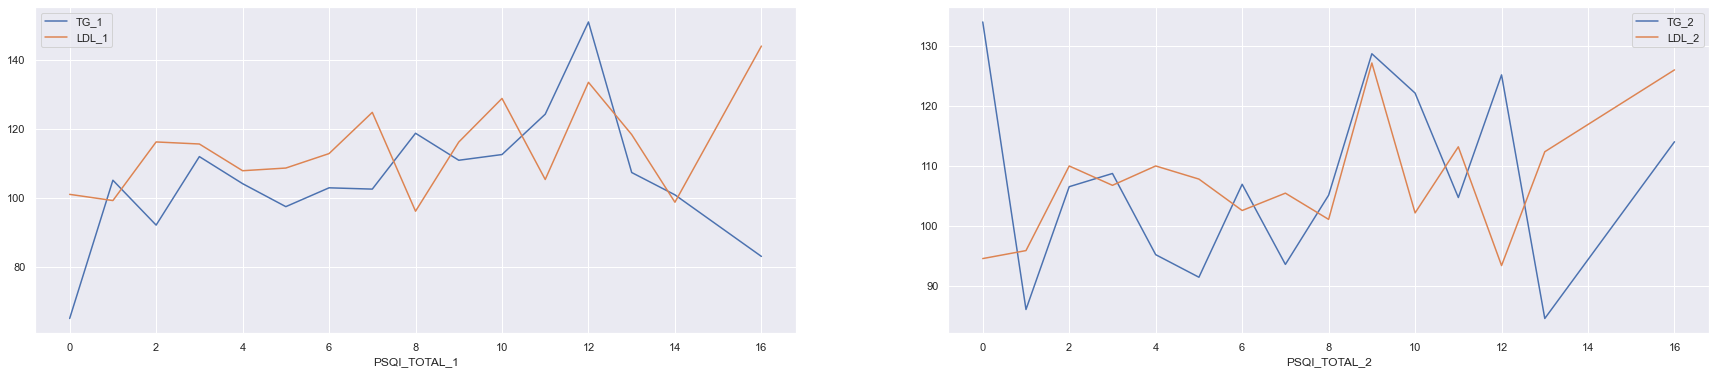

In [19]:
fig, ax = plt.subplots(1,2)

psqi_1.plot(kind='line', ax=ax[0])    # bar(수직막대)
psqi_2.plot(kind='line', ax=ax[1])
plt.rcParams['figure.figsize'] = [30, 6] # [width, height] (inches)
plt.show()

# SMOKE 와 혈중 지질 농도

In [24]:
df_smoke = cut_df_t.dropna(subset = ['SMOKE_1','SMOKE_2','TG_1','TG_2','LDL_1','LDL_2','HDL_1','HDL_2','TC_1','TC_2'])
df_smoke.isnull().sum()
df_smoke = df_smoke[(df_smoke['SMOKE_2'] != -9) & (df_smoke['SMOKE_1'] != 0) & (df_smoke['SMOKE_2'] != 0)]

df_smoke

,Sample_ID,GROUP,SEX,AGE,HDL_1,HDL_2,TG_1,TG_2,LDL_1,LDL_2,MD_wine_1,MD_wine_2,SMOKE_1,SMOKE_2,PSQI_TOTAL_1,PSQI_TOTAL_2,TC_1,TC_2
0,S0001,SMI,M,60,61,77.0,81,75.0,111,112.0,0.0,0.0,3,3,8.0,7.0,188.2,204.0
1,S0002,SMI,M,61,60,59.0,106,101.0,77,77.0,0.0,1.0,2,2,4.0,8.0,158.2,156.2
2,S0003,SMI,F,52,40,40.0,231,183.0,155,128.0,0.0,0.0,1,1,3.0,4.0,241.2,204.6
3,S0004,SMI,F,41,58,54.0,94,78.0,145,119.0,0.0,0.0,1,1,6.0,6.0,221.8,188.6
4,S0005,SMI,F,41,81,72.0,70,42.0,123,114.0,0.0,0.0,1,1,10.0,8.0,218.0,194.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,MetS_S0217,MetS,F,63,55,66.0,64,46.0,65,56.0,0.0,0.0,1,1,3.0,8.0,132.8,131.2
231,MetS_S0218,MetS,M,57,51,51.0,62,76.0,57,66.0,0.0,0.0,1,1,4.0,3.0,120.4,132.2
232,MetS_S0220,MetS,F,35,58,49.0,88,91.0,94,83.0,0.0,0.0,1,1,1.0,2.0,169.6,150.2
233,MetS_S0222,MetS,F,61,58,60.0,65,62.0,52,53.0,0.0,0.0,1,1,8.0,7.0,123.0,125.4


In [27]:
#과거흡연자를 비흡연자로 바꿈

df_smoke = df_smoke.replace({'SMOKE_1': 2}, {'SMOKE_1': 1})
df_smoke = df_smoke.replace({'SMOKE_2': 2}, {'SMOKE_2': 1})
df_smoke

,Sample_ID,GROUP,SEX,AGE,HDL_1,HDL_2,TG_1,TG_2,LDL_1,LDL_2,MD_wine_1,MD_wine_2,SMOKE_1,SMOKE_2,PSQI_TOTAL_1,PSQI_TOTAL_2,TC_1,TC_2
0,S0001,SMI,M,60,61,77.0,81,75.0,111,112.0,0.0,0.0,3,3,8.0,7.0,188.2,204.0
1,S0002,SMI,M,61,60,59.0,106,101.0,77,77.0,0.0,1.0,1,1,4.0,8.0,158.2,156.2
2,S0003,SMI,F,52,40,40.0,231,183.0,155,128.0,0.0,0.0,1,1,3.0,4.0,241.2,204.6
3,S0004,SMI,F,41,58,54.0,94,78.0,145,119.0,0.0,0.0,1,1,6.0,6.0,221.8,188.6
4,S0005,SMI,F,41,81,72.0,70,42.0,123,114.0,0.0,0.0,1,1,10.0,8.0,218.0,194.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,MetS_S0217,MetS,F,63,55,66.0,64,46.0,65,56.0,0.0,0.0,1,1,3.0,8.0,132.8,131.2
231,MetS_S0218,MetS,M,57,51,51.0,62,76.0,57,66.0,0.0,0.0,1,1,4.0,3.0,120.4,132.2
232,MetS_S0220,MetS,F,35,58,49.0,88,91.0,94,83.0,0.0,0.0,1,1,1.0,2.0,169.6,150.2
233,MetS_S0222,MetS,F,61,58,60.0,65,62.0,52,53.0,0.0,0.0,1,1,8.0,7.0,123.0,125.4


In [28]:
tg_smoke = pd.DataFrame(df_smoke.groupby(['SMOKE_1']).TG_1.mean())
ldl_smoke = pd.DataFrame(df_smoke.groupby(['SMOKE_1']).LDL_1.mean())
tc_smoke = pd.DataFrame(df_smoke.groupby(['SMOKE_1']).TC_1.mean())

smoke_1=pd.concat([tg_smoke,ldl_smoke,tc_smoke],axis=1)
smoke_1

,TG_1,LDL_1,TC_1
SMOKE_1,,,
1,105.541284,114.541284,196.085321
3,168.200000,108.133333,198.506667


In [29]:
tg_smoke = pd.DataFrame(df_smoke.groupby(['SMOKE_2']).TG_2.mean())
ldl_smoke = pd.DataFrame(df_smoke.groupby(['SMOKE_2']).LDL_2.mean())
tc_smoke = pd.DataFrame(df_smoke.groupby(['SMOKE_2']).TC_2.mean())

smoke_2=pd.concat([tg_smoke,ldl_smoke,tc_smoke],axis=1)
smoke_2

,TG_2,LDL_2,TC_2
SMOKE_2,,,
1,103.156682,109.691244,189.483871
3,144.437500,107.312500,193.512500


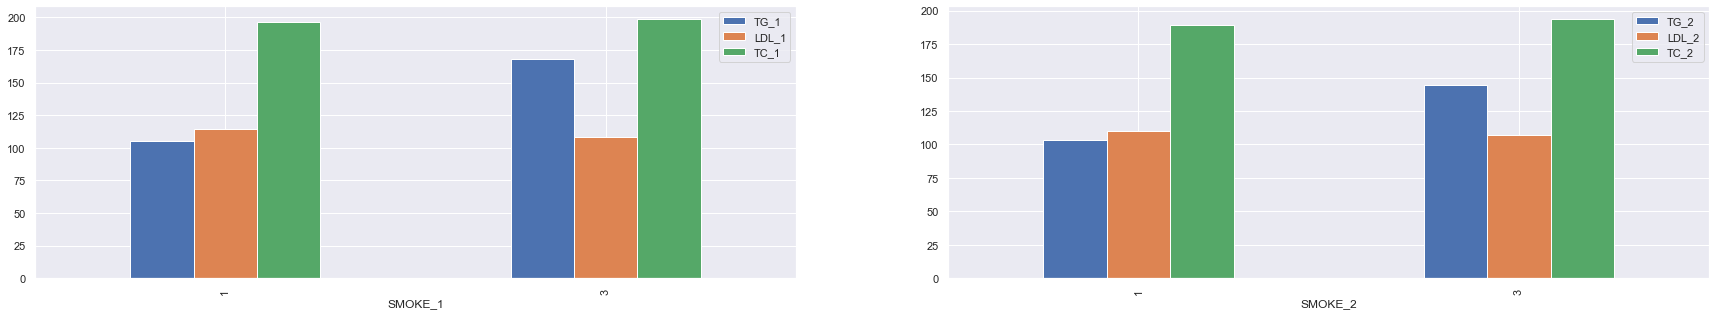

In [37]:
fig, ax = plt.subplots(1,2)

smoke_1.plot(kind='bar', ax=ax[0])    # bar(수직막대)
smoke_2.plot(kind='bar', ax=ax[1])
plt.rcParams["figure.figsize"] = (30,2)
plt.show()

# WINE(알코올)과 혈중 지질 농도

df_wine = cut_df_t.dropna(subset = ['MD_wine_1','MD_wine_2','TG_1','TG_2','LDL_1','LDL_2','HDL_1','HDL_2','TC_1','TC_2'])
df_wine.isnull().sum()

df_wine

tg_wine = pd.DataFrame(df_smoke.groupby(['MD_wine_1']).TG_1.mean())
ldl_wine = pd.DataFrame(df_smoke.groupby(['MD_wine_1']).LDL_1.mean())
hdl_wine = pd.DataFrame(df_smoke.groupby(['MD_wine_1']).HDL_1.mean())
tc_wine = pd.DataFrame(df_smoke.groupby(['MD_wine_1']).TC_1.mean())

wine_1=pd.concat([tg_wine,ldl_wine,hdl_wine,tc_wine],axis=1)
wine_1

tg_wine = pd.DataFrame(df_smoke.groupby(['MD_wine_2']).TG_2.mean())
ldl_wine = pd.DataFrame(df_smoke.groupby(['MD_wine_2']).LDL_2.mean())
hdl_wine = pd.DataFrame(df_smoke.groupby(['MD_wine_2']).HDL_2.mean())
tc_wine = pd.DataFrame(df_smoke.groupby(['MD_wine_2']).TC_2.mean())

wine_2=pd.concat([tg_wine,ldl_wine,hdl_wine,tc_wine],axis=1)
wine_2

fig, ax = plt.subplots(1,2)

wine_1.plot(kind='bar', ax=ax[0])    # bar(수직막대)
wine_2.plot(kind='bar', ax=ax[1])
plt.rcParams["figure.figsize"] = (4,10)
plt.show()

# PSQI와 SMOKE 관계

In [40]:
cut_df_t

,Sample_ID,GROUP,SEX,AGE,HDL_1,HDL_2,TG_1,TG_2,LDL_1,LDL_2,MD_wine_1,MD_wine_2,SMOKE_1,SMOKE_2,PSQI_TOTAL_1,PSQI_TOTAL_2,TC_1,TC_2
0,S0001,SMI,M,60,61,77.0,81,75.0,111,112.0,0.0,0.0,3,3,8.0,7.0,188.2,204.0
1,S0002,SMI,M,61,60,59.0,106,101.0,77,77.0,0.0,1.0,2,2,4.0,8.0,158.2,156.2
2,S0003,SMI,F,52,40,40.0,231,183.0,155,128.0,0.0,0.0,1,1,3.0,4.0,241.2,204.6
3,S0004,SMI,F,41,58,54.0,94,78.0,145,119.0,0.0,0.0,1,1,6.0,6.0,221.8,188.6
4,S0005,SMI,F,41,81,72.0,70,42.0,123,114.0,0.0,0.0,1,1,10.0,8.0,218.0,194.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,MetS_S0217,MetS,F,63,55,66.0,64,46.0,65,56.0,0.0,0.0,1,1,3.0,8.0,132.8,131.2
231,MetS_S0218,MetS,M,57,51,51.0,62,76.0,57,66.0,0.0,0.0,1,1,4.0,3.0,120.4,132.2
232,MetS_S0220,MetS,F,35,58,49.0,88,91.0,94,83.0,0.0,0.0,1,1,1.0,2.0,169.6,150.2
233,MetS_S0222,MetS,F,61,58,60.0,65,62.0,52,53.0,0.0,0.0,1,1,8.0,7.0,123.0,125.4


In [53]:
df_rel = cut_df_t.dropna(subset = ['PSQI_TOTAL_1','PSQI_TOTAL_2','SMOKE_1','SMOKE_2','TG_1','TG_2','LDL_1','LDL_2','HDL_1','HDL_2','TC_1','TC_2'])
#df_rel.isnull().sum()
df_rel['SMOKE_1'].value_counts() #흡연자의 데이터가 너무 작다
#df_rel['SMOKE_2'].value_counts()

1    195
2     23
3     15
0      2
Name: SMOKE_1, dtype: int64

In [41]:
#잘못된 데이터 필터
df_rel = df_rel[(df_rel['SMOKE_2'] != -9) & (df_rel['SMOKE_1'] != 0) & (df_rel['SMOKE_2'] != 0)]

#과거흡연자를 흡연자로 바꿈
df_rel = df_rel.replace({'SMOKE_1': 2}, {'SMOKE_1': 3})
df_rel = df_rel.replace({'SMOKE_2': 2}, {'SMOKE_2': 3})
df_rel

,Sample_ID,GROUP,SEX,AGE,HDL_1,HDL_2,TG_1,TG_2,LDL_1,LDL_2,MD_wine_1,MD_wine_2,SMOKE_1,SMOKE_2,PSQI_TOTAL_1,PSQI_TOTAL_2,TC_1,TC_2
0,S0001,SMI,M,60,61,77.0,81,75.0,111,112.0,0.0,0.0,3,3,8.0,7.0,188.2,204.0
1,S0002,SMI,M,61,60,59.0,106,101.0,77,77.0,0.0,1.0,1,1,4.0,8.0,158.2,156.2
2,S0003,SMI,F,52,40,40.0,231,183.0,155,128.0,0.0,0.0,1,1,3.0,4.0,241.2,204.6
3,S0004,SMI,F,41,58,54.0,94,78.0,145,119.0,0.0,0.0,1,1,6.0,6.0,221.8,188.6
4,S0005,SMI,F,41,81,72.0,70,42.0,123,114.0,0.0,0.0,1,1,10.0,8.0,218.0,194.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,MetS_S0217,MetS,F,63,55,66.0,64,46.0,65,56.0,0.0,0.0,1,1,3.0,8.0,132.8,131.2
231,MetS_S0218,MetS,M,57,51,51.0,62,76.0,57,66.0,0.0,0.0,1,1,4.0,3.0,120.4,132.2
232,MetS_S0220,MetS,F,35,58,49.0,88,91.0,94,83.0,0.0,0.0,1,1,1.0,2.0,169.6,150.2
233,MetS_S0222,MetS,F,61,58,60.0,65,62.0,52,53.0,0.0,0.0,1,1,8.0,7.0,123.0,125.4


In [47]:
#범위 필터
df_rel = df_rel[(df_rel['TG_1'] <= 300) & (df_rel['TG_2'] <= 300) & (df_rel['LDL_1'] <= 200) & (df_rel['LDL_2'] <= 200)]

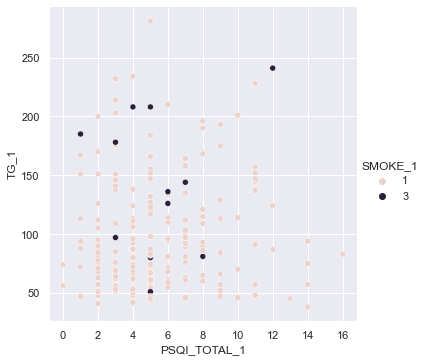

In [49]:
sns.relplot(x='PSQI_TOTAL_1',y='TG_1',hue='SMOKE_1',sizes=(15,200),data=df_rel)

In [50]:
df_rel['SMOKE_1'].value_counts()

1    210
3     14
Name: SMOKE_1, dtype: int64

In [51]:
df_rel['SMOKE_2'].value_counts()

1    209
3     15
Name: SMOKE_2, dtype: int64